Part 1: Import all necessory libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Part 2: create a function that identify the best predictor(will return training socre and testing score)

In [64]:
def bestPredictor(xvalue,yvalue,depth):

  #if xvalue =sex, we need to dummy code it
  if xvalue == "sex":
    data = pd.get_dummies(df['sex'],drop_first=True)
    x= np.array(data["male"])
    y= np.array(df[yvalue])
  
  #if not, just change it to array
  else:
    #Change x and y to array
    x= np.array(df[xvalue])
    y= np.array(df[yvalue])


  #Reshape X
  X= x.reshape(len(x),1)

  #split train and test dataset
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  #Fit Xtrain and ytrain into tree model
  tree_model = tree.DecisionTreeClassifier(max_depth= depth) 
  tree_model = tree_model.fit(Xtrain, ytrain)

  #get the scores for training and testing
  training_score = tree_model.score(Xtrain, ytrain)
  testing_score = tree_model.score(Xtest, ytest)

  #get y predicted, use it to get values to plot roc curve
  y_predicted = tree_model.predict_proba(Xtest)[:,1]
  fpr,tpr,thresholds = metrics.roc_curve(ytest,y_predicted)
  
  #create axes for subplot
  f,axes = plt.subplots(1,2, figsize=[10,7])
  

  print('Do you want a figures?Please only answer with "yes" or "no" ')
  answer = input()
  
  
  #If we don't need a figure, just print training and testing score
  if answer == "no":
    print('training_score = ',training_score)
    print('testing_score = ',testing_score) 
  
  #Else, we print the figures+training and testing score
  else:
    #create a boxplot with X and y
    sns.boxplot(y,x,ax=axes[0])
    #create a roc plot
    axes[1].plot(fpr,tpr,marker='o')
    axes[1].plot([0,1],[0,1])
    print('training_score = ',training_score)
  print('testing_score = ',testing_score)

Not part of problem set requirement:

I create this extra function to test the best decision tree max-depth value that isn’t overfitting.It's simple just a copy of part 2 function without input and subplot.

The function in part 2 should fullfill all requirement!


In [66]:
def testing(xvalue,yvalue,depth):
  if xvalue == "sex":
    data = pd.get_dummies(df['sex'],drop_first=True)
    x= np.array(data["male"])
    y= np.array(df[yvalue])
    
  else:
    #Change x and y to array
    x= np.array(df[xvalue])
    y= np.array(df[yvalue])


  #Reshape X
  X= x.reshape(len(x),1)

  #split train and test dataset
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  #Fit Xtrain and ytrain into tree model
  tree_model = tree.DecisionTreeClassifier(max_depth= depth) 
  tree_model = tree_model.fit(Xtrain, ytrain)

  #get the scores for training and testing
  training_score = tree_model.score(Xtrain, ytrain)
  testing_score = tree_model.score(Xtest, ytest)

  #get y predicted, use it to get values to plot roc curve
  y_predicted = tree_model.predict_proba(Xtest)[:,1]
  fpr,tpr,thresholds = metrics.roc_curve(ytest,y_predicted)
  
  

  print('training_score = ',training_score)
  print('testing_score = ',testing_score)



Part 3: Load dataset Titanic

In [4]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Part 4: Use the function with **fare** as a predictor of survived.

training_score =  0.6302395209580839
testing_score =  0.5739910313901345
None
training_score =  0.688622754491018
testing_score =  0.6278026905829597
None
training_score =  0.6931137724550899
testing_score =  0.6143497757847534
None
training_score =  0.7050898203592815
testing_score =  0.6233183856502242
None
training_score =  0.7140718562874252
testing_score =  0.6143497757847534
None
training_score =  0.7230538922155688
testing_score =  0.6322869955156951
None
training_score =  0.7380239520958084
testing_score =  0.6636771300448431
None
training_score =  0.7455089820359282
testing_score =  0.6771300448430493
None
training_score =  0.7604790419161677
testing_score =  0.6681614349775785
None
training_score =  0.7634730538922155
testing_score =  0.6636771300448431
None
training_score =  0.7754491017964071
testing_score =  0.6457399103139013
None
training_score =  0.7784431137724551
testing_score =  0.6547085201793722
None
training_score =  0.7904191616766467
testing_score =  0.641255605

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


training_score =  0.7604790419161677
testing_score =  0.6681614349775785
None


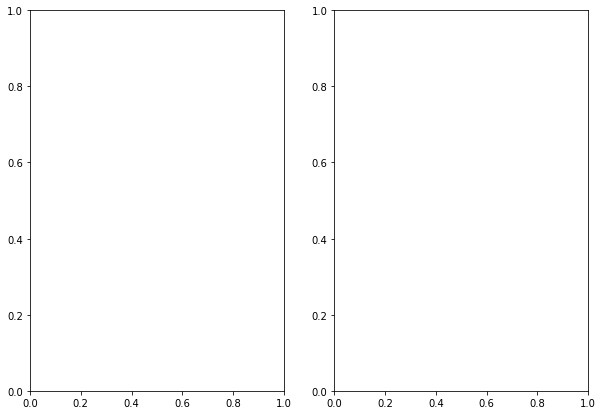

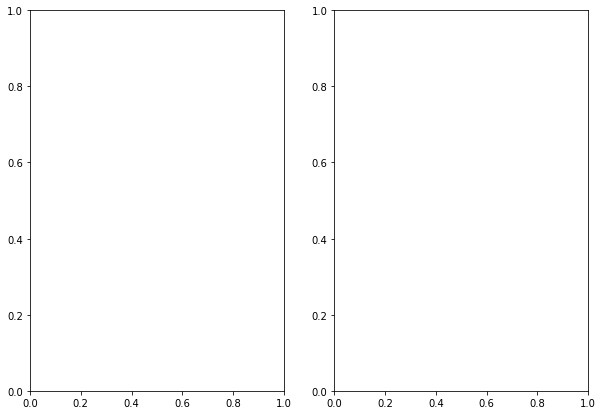

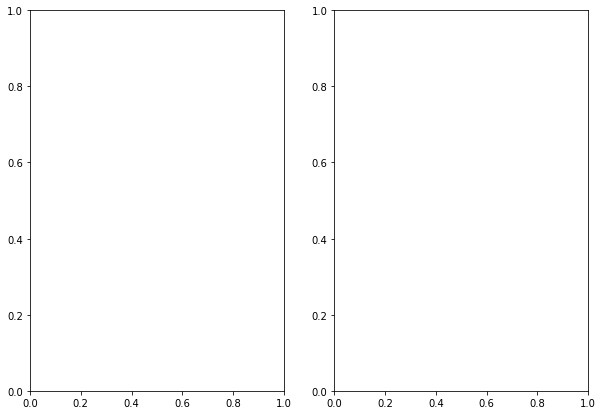

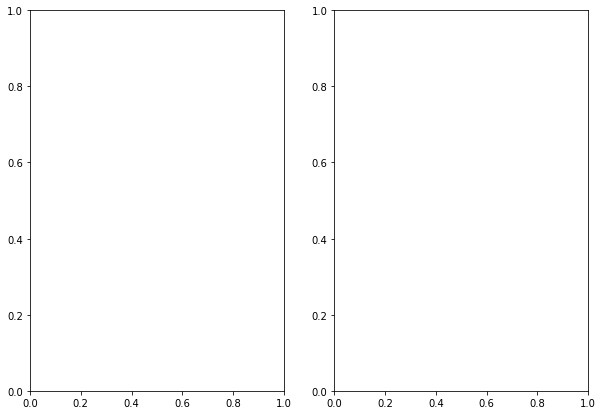

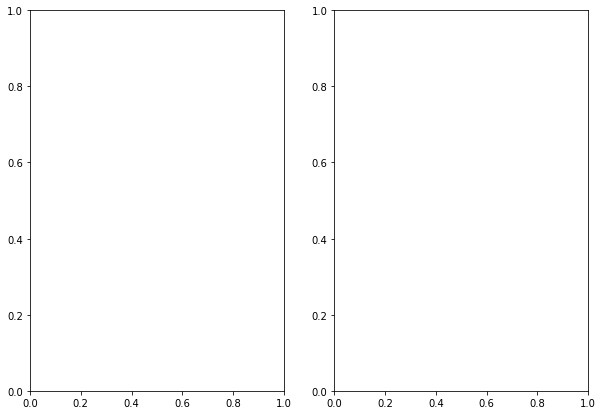

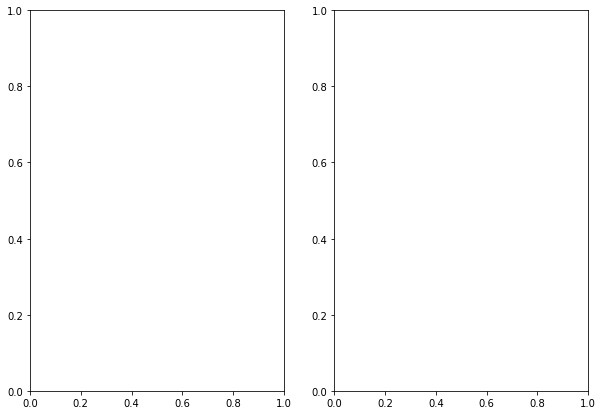

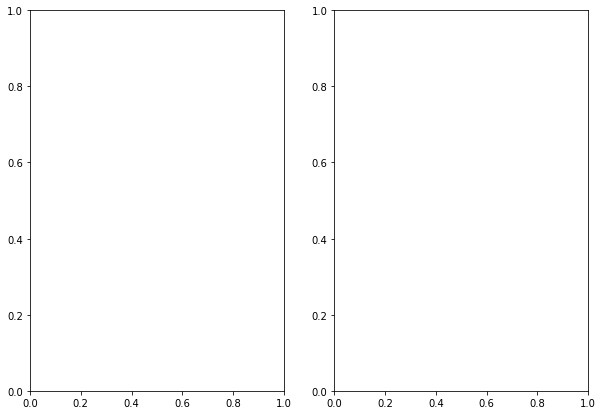

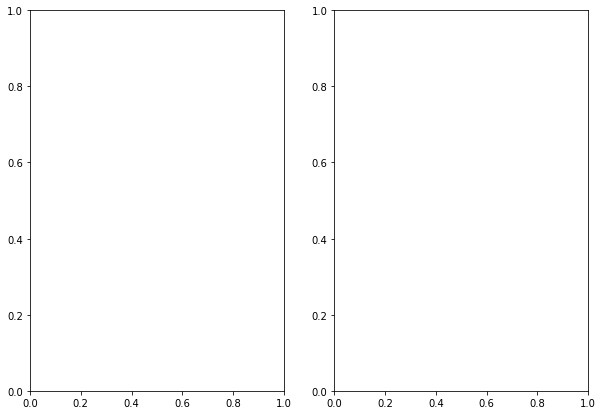

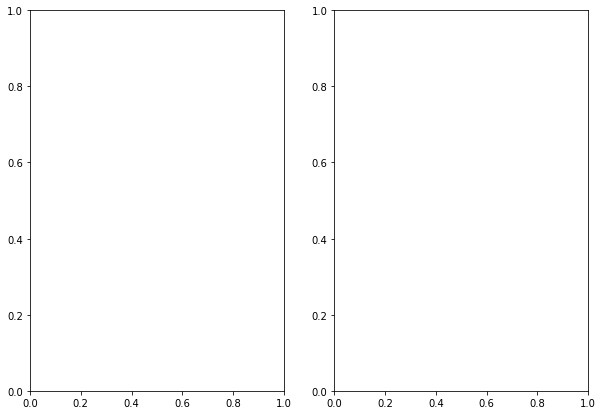

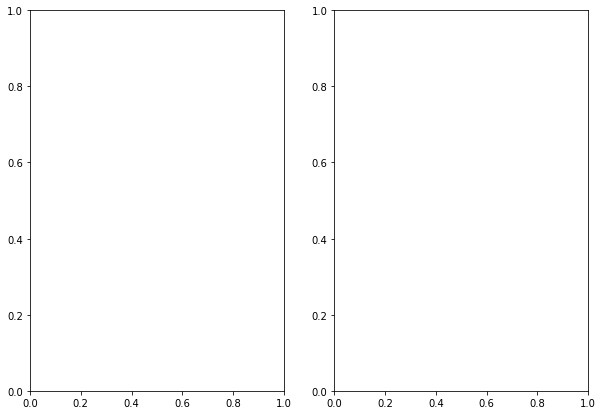

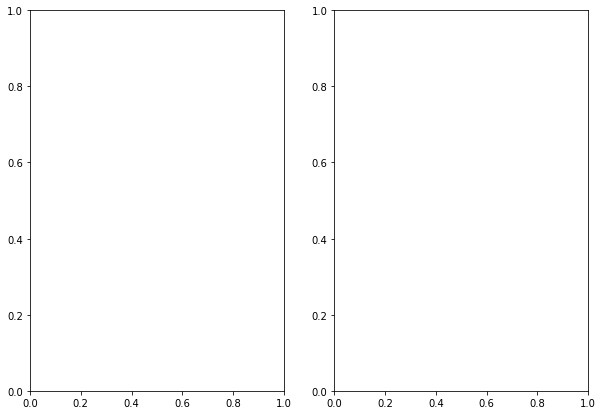

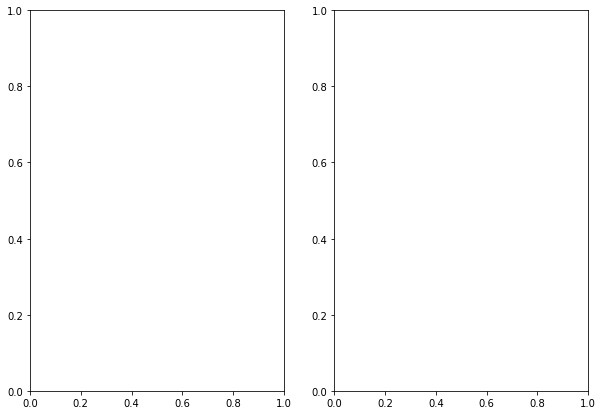

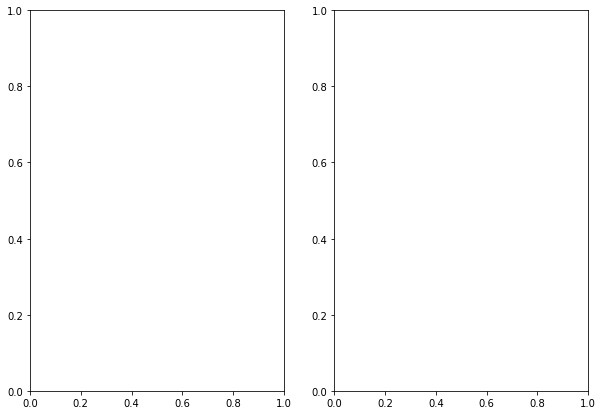

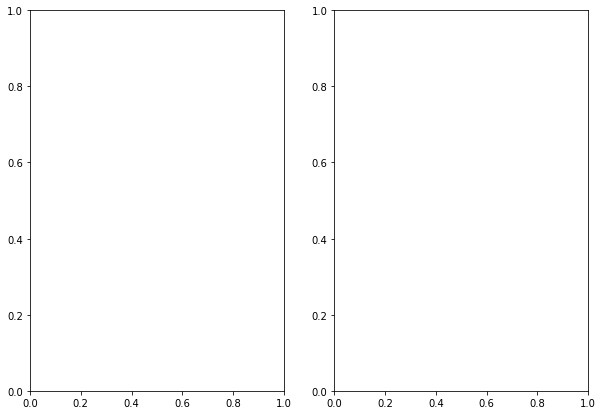

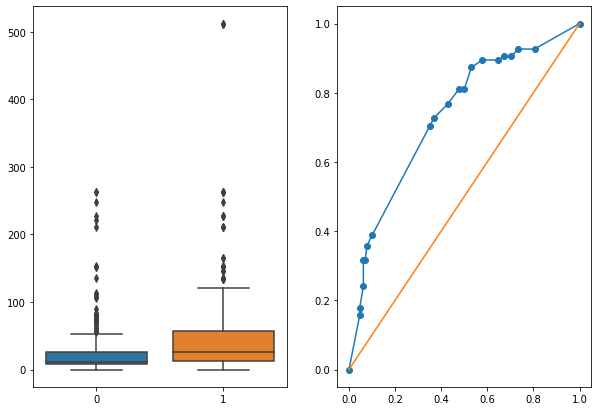

In [65]:
#get fare, pclass and survived
fare = df.columns[6]
pclass = df.columns[1]
survived = df.columns[0]

#Use test method to test wich max-depth is the best and not overfitting
for i in range(1,15):
  print(testing(fare,survived, i))

#By looking at possoble max_depth from 1 to 29, the cusp of overfitting is 
#When Max_Depth =9 for fare


#print best score for fare as a predictor
print("Best Score for fare as a predictor:")
print(bestPredictor(fare,survived, 9))






Part 5: Use the function with **pclass** as a predictor of survived.

training_score =  0.6751497005988024
testing_score =  0.6457399103139013
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None
training_score =  0.6826347305389222
testing_score =  0.66816143

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


training_score =  0.6826347305389222
testing_score =  0.6681614349775785
None


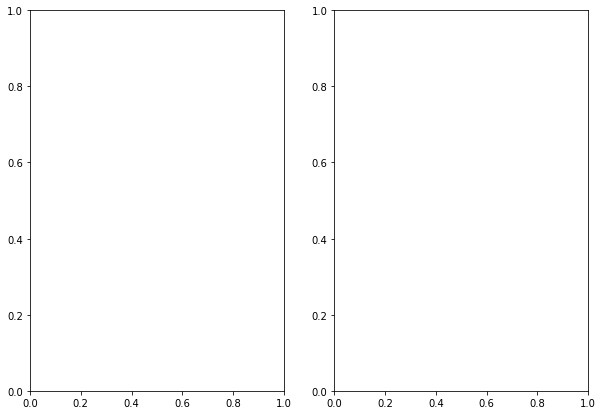

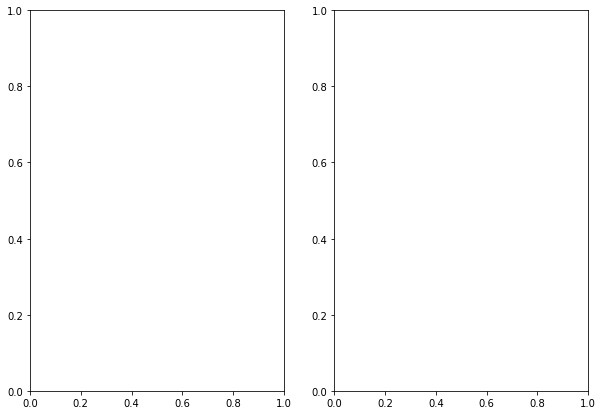

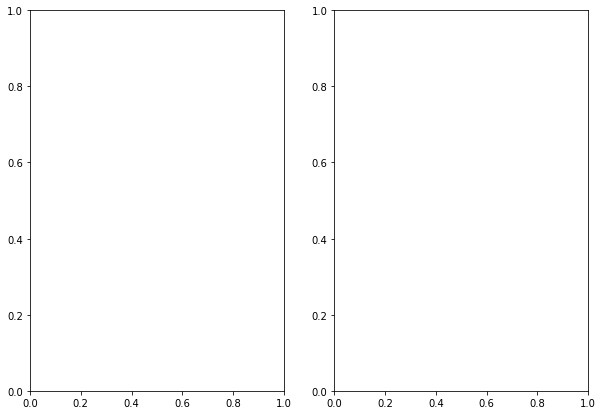

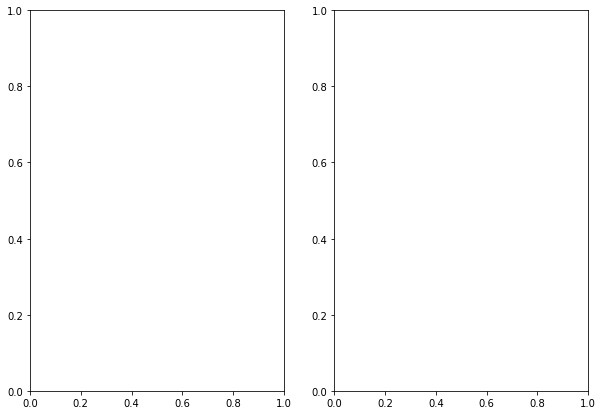

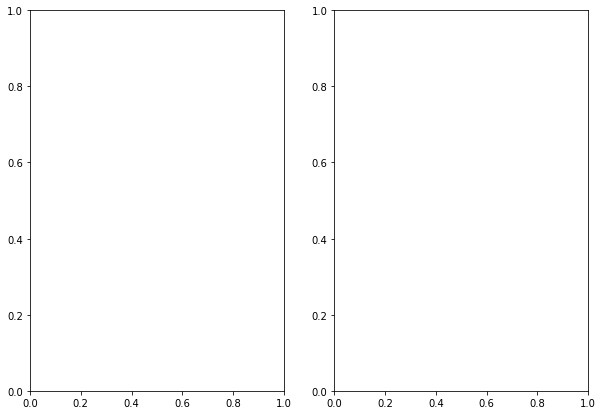

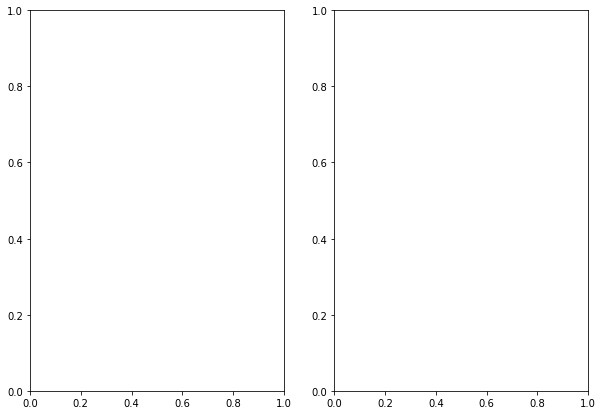

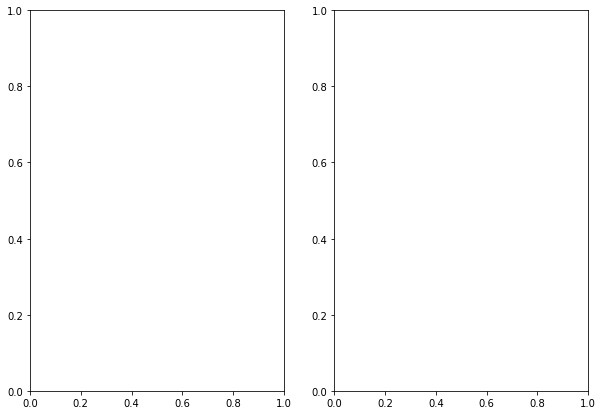

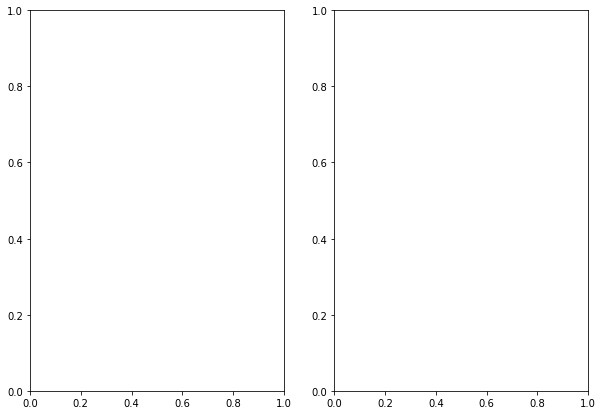

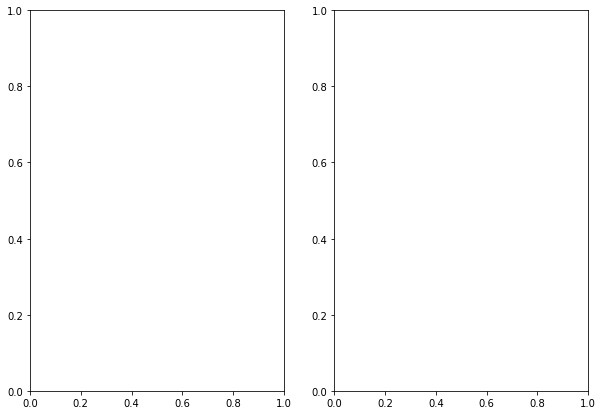

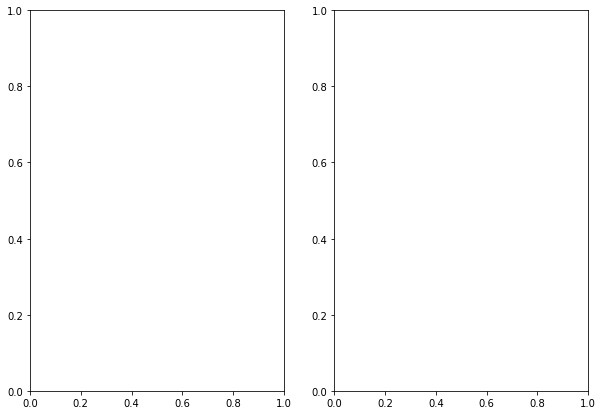

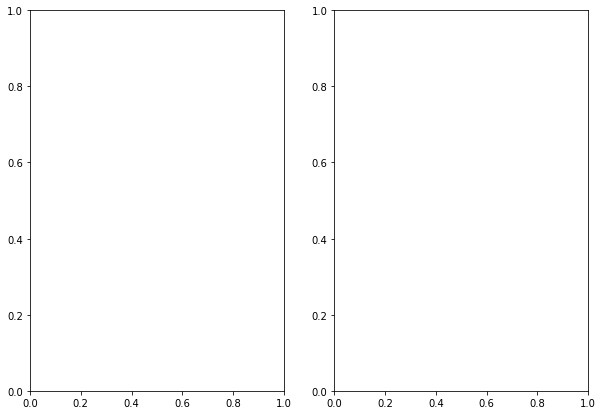

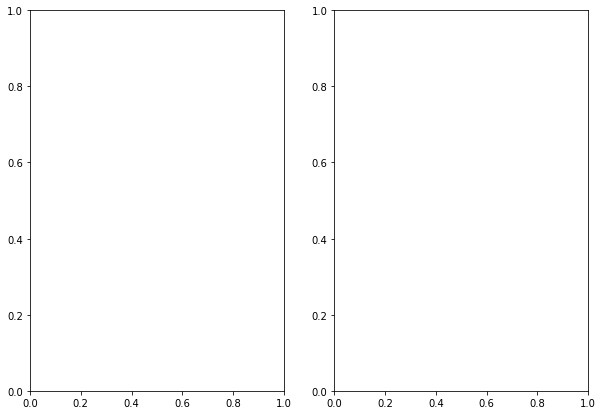

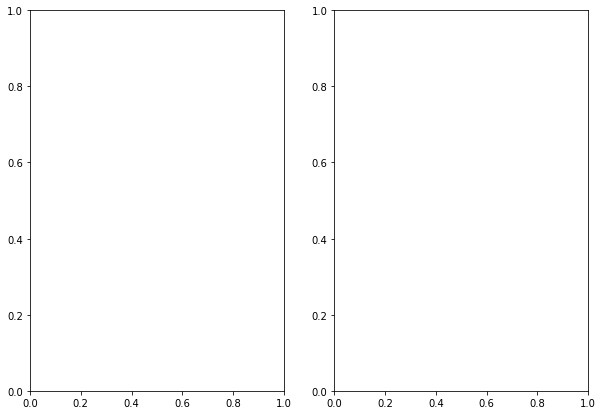

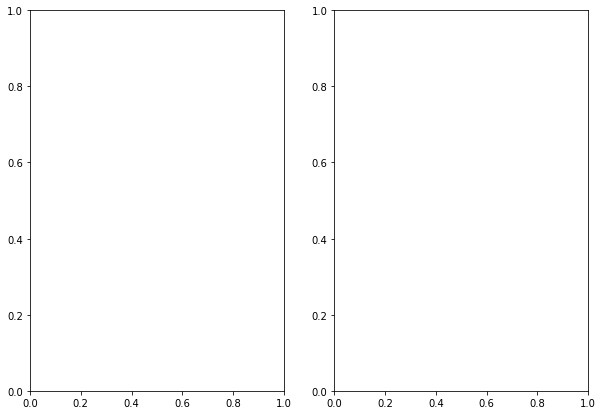

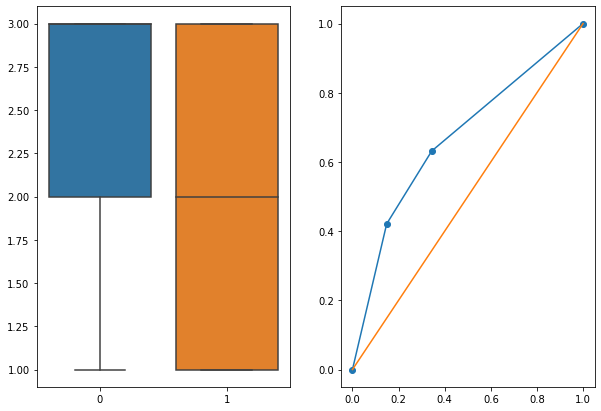

In [63]:
#Use test method to test wich max-depth is the best and not overfitting
for i in range(1,15):
 print(testing(pclass,survived, i))

#By looking at possoble max_depth from 1 to 29, the cusp of overfitting is 
#When Max_Depth =2 for pclass

#print best score for pclass as a predictor
print("Best Score for pclass as a predictor:")
print(bestPredictor(pclass,survived, 2))

Bonus Part 6: Use the function with **sex** as a predictor of survived.

training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None
training_score =  0.7874251497005988
testing_score =  0.78475336

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


training_score =  0.7874251497005988
testing_score =  0.7847533632286996
None


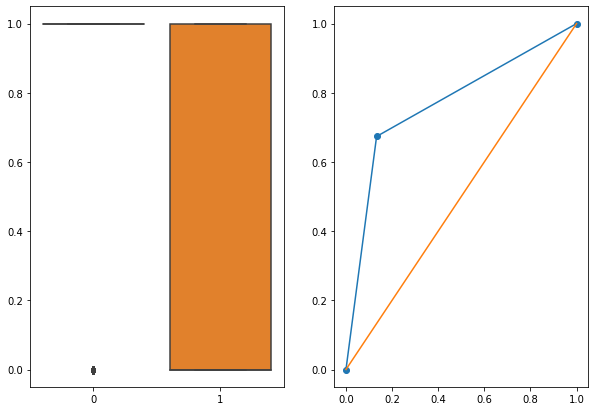

In [67]:
#get sex
sex = df.columns[3]

#Use test method to test wich max-depth is the best and not overfitting
for i in range(1,15):
 print(testing(sex,survived, i))

#By looking at possoble max_depth from 1 to 15, the cusp of overfitting is 
#When Max_Depth =1 for sex


#print best score for fare as a predictor
print("Best Score for fare as a predictor:")
print(bestPredictor(sex,survived, 1))

Bonus Part 7: Use the function with **age** as a predictor of survived.

In [68]:
#get age
age = df.columns[3]

#Use test method to test wich max-depth is the best and not overfitting
for i in range(1,15):
 print(testing(age,survived, i))

#By looking at possoble max_depth from 1 to 15, the cusp of overfitting is 
#When Max_Depth =1 for sex


#print best score for fare as a predictor
print("Best Score for age as a predictor:")
print(bestPredictor(age,survived, 1))

ValueError: ignored

**Conclution:**

1.Fare is a better predictor for survival than pclass because at while the testing score of both predictor are the same(0.6681614349775785), Fare has a higher training score(0.7604790419161677) than pclass(0.6826347305389222)